Importing the modules we need

In [1]:
import numpy as np
import warnings; warnings.simplefilter('ignore')
from netCDF4 import Dataset

### Reading NetCDF4 files

First we read the files with the netCDF4 function ``Dataset``

In [2]:
tasMaxFile = "/galileo/home/usertrain/a08trb24/ecas/tasmax_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc"
tasMinFile = "/galileo/home/usertrain/a08trb24/ecas/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc"

In [3]:
maxDs = Dataset(tasMaxFile)
minDs = Dataset(tasMinFile)

NetCDF4 module gives us attributes for inspecting the data in the NetCDF4 files.

Attribute ``dimensions`` will tell us what dimensions are in the file and what are their sizes.

In the files we will see the following dimensions:

 * time with size 1826
 * lon (Longitude) with size 96
 * lat (Latitude) with size 48

 
In short we expect that the NetCDF4 files will contain quantities for each geographical location, described with a ``longitude`` and ``latitude`` grid with size ``96 x 48``. For each point there will be 1826 samples at different time step, described with the variable ``time``.

In [4]:
maxDs.dimensions

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1826),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 48),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 96),
             ('bnds',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2)])

In [5]:
minDs.dimensions

OrderedDict([('time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1826),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 48),
             ('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 96),
             ('bnds',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2)])

The ``variables`` shows us quantities along with extra information, describing them. In this case we will focus on
``tasmax`` and ``tasmin``.

Both are arrays of ``float32`` of shape ``(time, lat, lon)``. That means that the shape of tasmax is ``(1826, 48, 96)`` and contains 8414208 values. Note that the shape is reversed, i.e. the first index denotes the time dimension and not longitude, as the intuitive order for the indexes would be (lon, lat, time).

In [6]:
maxDs.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  bounds: time_bnds
                  units: days since 2096-1-1
                  calendar: standard
                  axis: T
                  long_name: time
                  standard_name: time
              unlimited dimensions: time
              current shape = (1826,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
              float64 time_bnds(time, bnds)
              unlimited dimensions: time
              current shape = (1826, 2)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  bounds: lat_bnds
                  units: degrees_north
                  axis: Y
                  long_name: latitude
                  standard_name: latitude
    

In [7]:
minDs.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  bounds: time_bnds
                  units: days since 2096-1-1
                  calendar: standard
                  axis: T
                  long_name: time
                  standard_name: time
              unlimited dimensions: time
              current shape = (1826,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time_bnds', <class 'netCDF4._netCDF4.Variable'>
              float64 time_bnds(time, bnds)
              unlimited dimensions: time
              current shape = (1826, 2)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  bounds: lat_bnds
                  units: degrees_north
                  axis: Y
                  long_name: latitude
                  standard_name: latitude
    

Since the variables attribute is a dictionary we can easilly extract a variable.

In [8]:
maxDs.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 2096-1-1
    calendar: standard
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1826,)
filling on, default _FillValue of 9.969209968386869e+36 used

### This is a masked numpy array so we can also perform numpy operations or numpy functions on them.

In [9]:
maxTime = maxDs.variables['time']
maxTime[0:10]

masked_array(data=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5],
             mask=False,
       fill_value=1e+20)

In [10]:
maxTime[0:10] ** 2

masked_array(data=[ 0.25,  2.25,  6.25, 12.25, 20.25, 30.25, 42.25, 56.25,
                   72.25, 90.25],
             mask=False,
       fill_value=1e+20)

### Let's extract the data for latitude and longitude. This will be used to create a grid for visualization 

In [11]:
lat = maxDs.variables['lat'][:].data
lon = maxDs.variables['lon'][:].data

In [12]:
lat

array([-87.15909456, -83.47893667, -79.77704565, -76.07024446,
       -72.36158103, -68.65201679, -64.94194949, -61.23157319,
       -57.5209938 , -53.81027403, -50.09945341, -46.38855811,
       -42.67760617, -38.96661047, -35.25558046, -31.54452328,
       -27.83344445, -24.12234833, -20.41123843, -16.70011769,
       -12.98898858,  -9.27785325,  -5.56671363,  -1.85557149,
         1.85557149,   5.56671363,   9.27785325,  12.98898858,
        16.70011769,  20.41123843,  24.12234833,  27.83344445,
        31.54452328,  35.25558046,  38.96661047,  42.67760617,
        46.38855811,  50.09945341,  53.81027403,  57.5209938 ,
        61.23157319,  64.94194949,  68.65201679,  72.36158103,
        76.07024446,  79.77704565,  83.47893667,  87.15909456])

In [13]:
lon

array([  0.  ,   3.75,   7.5 ,  11.25,  15.  ,  18.75,  22.5 ,  26.25,
        30.  ,  33.75,  37.5 ,  41.25,  45.  ,  48.75,  52.5 ,  56.25,
        60.  ,  63.75,  67.5 ,  71.25,  75.  ,  78.75,  82.5 ,  86.25,
        90.  ,  93.75,  97.5 , 101.25, 105.  , 108.75, 112.5 , 116.25,
       120.  , 123.75, 127.5 , 131.25, 135.  , 138.75, 142.5 , 146.25,
       150.  , 153.75, 157.5 , 161.25, 165.  , 168.75, 172.5 , 176.25,
       180.  , 183.75, 187.5 , 191.25, 195.  , 198.75, 202.5 , 206.25,
       210.  , 213.75, 217.5 , 221.25, 225.  , 228.75, 232.5 , 236.25,
       240.  , 243.75, 247.5 , 251.25, 255.  , 258.75, 262.5 , 266.25,
       270.  , 273.75, 277.5 , 281.25, 285.  , 288.75, 292.5 , 296.25,
       300.  , 303.75, 307.5 , 311.25, 315.  , 318.75, 322.5 , 326.25,
       330.  , 333.75, 337.5 , 341.25, 345.  , 348.75, 352.5 , 356.25])

Next is to get the ``tasmax`` or the **daily maximum temperature** and ``tasmin`` or **daily minimum temperature**

In [14]:
dataMax = maxDs.variables['tasmax'][:]
dataMax

masked_array(
  data=[[[256.95618, 256.6593 , 256.34875, ..., 257.71594, 257.46204,
          257.1964 ],
         [262.0382 , 261.0265 , 260.0558 , ..., 265.29797, 264.1554 ,
          263.08704],
         [261.48547, 259.59485, 257.85657, ..., 267.57922, 265.2804 ,
          263.1964 ],
         ...,
         [273.16907, 273.14172, 272.69055, ..., 269.05774, 271.1222 ,
          272.60657],
         [264.0675 , 264.6964 , 265.2257 , ..., 261.42883, 262.4347 ,
          263.29797],
         [249.58702, 249.77061, 249.98546, ..., 249.30968, 249.31358,
          249.43468]],

        [[258.8719 , 258.61603, 258.36407, ..., 259.42462, 259.1883 ,
          259.0086 ],
         [263.11017, 262.1297 , 261.18048, ..., 266.77618, 265.4129 ,
          264.21368],
         [262.14728, 260.10626, 258.73907, ..., 267.64728, 266.05353,
          263.9422 ],
         ...,
         [274.0379 , 274.23322, 274.14142, ..., 269.98907, 272.0672 ,
          273.4383 ],
         [270.03204, 270.74884, 271.

In [15]:
dataMin = minDs.variables['tasmin'][:]
dataMin

masked_array(
  data=[[[255.34846, 254.99104, 254.61409, ..., 256.21564, 255.93831,
          255.63557],
         [259.15118, 258.0047 , 256.9422 , ..., 262.62775, 261.46173,
          260.3133 ],
         [256.48907, 254.62581, 253.03792, ..., 263.25665, 260.44806,
          258.19806],
         ...,
         [270.47345, 270.10236, 270.40314, ..., 265.7254 , 267.8133 ,
          269.55353],
         [259.45197, 260.21954, 260.46564, ..., 256.52814, 257.58673,
          258.5594 ],
         [246.90706, 247.3094 , 247.71175, ..., 245.98714, 246.24886,
          246.53206]],

        [[256.5523 , 256.31012, 256.0523 , ..., 257.2574 , 257.0152 ,
          256.7906 ],
         [259.78668, 258.88824, 257.9859 , ..., 262.7984 , 261.7066 ,
          260.72028],
         [258.43512, 256.8277 , 255.38237, ..., 264.33942, 261.84528,
          259.8023 ],
         ...,
         [273.2027 , 273.20074, 272.72028, ..., 269.02496, 271.15192,
          272.63043],
         [264.1695 , 264.7945 , 265.

In [16]:
dataMax.shape

(1826, 48, 96)

In [17]:
dataMax[1825][0][0]

260.47763

Now we shall calculate the average daily maximum temperature and daily minimum temperature.

First we create empty or zero-filled arrays of with the shape of the grid.

In [18]:
meanMax = np.zeros((48, 96))
meanMin = np.zeros((48, 96))

Now for each point in the ``longitude x latitude`` grid we shall calculate the average daily minimum and average daily maximum temperature.

In [28]:
def calculateMean(input, meanArray):
    """Input array contains the value and the shape of (N, x, y), where N means the number of measurements
    at each points x, y. The meanArray is an empty container that will be filled with the average value at
    each point.
    
    For calculating the average of values at one (x,y) point the function np.mean is used.
    
    Note that the function returns nothing, since the input argument ``meanArray`` is used for storing the
    results.
    """
    nx, ny = meanArray.shape
    for i in range(nx):
        for j in range(ny):
            meanArray[i, j] = np.mean(input[:, i, j])
    

calculateMean(dataMax, meanMax)
calculateMean(dataMin, meanMin)

Just to be sure, the variables meanMax and meanMax should now contain only one value at each point in the grid, meaning the shape should be (48, 96).

In [29]:
meanMax.shape

(48, 96)

Now we can plot the ``Average daily maximum temperature``, ``Average daily minimum temperature`` and ``Average difference between daily maximum and daily minimum temperature``.

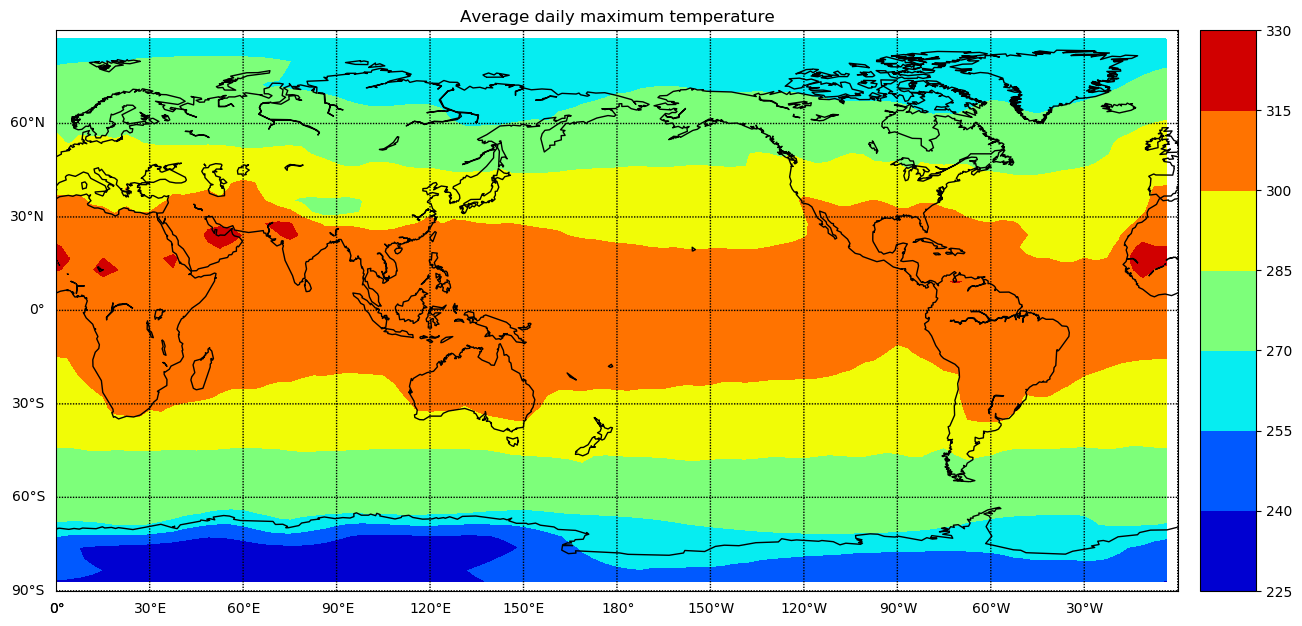

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB'] = os.path.expanduser("/galileo/home/usertrain/a08trb24/data_analysis/share/proj")
from mpl_toolkits.basemap import Basemap, cm
import numpy as np

fig = plt.figure(figsize=(15, 15), dpi=100)
ax  = fig.add_axes([0.1,0.1,0.8,0.8])

# Basemap used for drawing the world map
map = Basemap(projection='cyl',llcrnrlat= -90,urcrnrlat= 90, llcrnrlon=0,urcrnrlon=360, resolution='c')

map.drawcoastlines()
map.drawparallels(np.arange( -90, 90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

x, y = np.meshgrid(lon,lat)

# Contour levels ranging from 0 to 20 with increment of 1.
clevs = np.arange(0,20,1)

cnplot = map.contourf(x,y,meanMax,cmap=plt.cm.jet)
cbar = map.colorbar(cnplot,location='right')

plt.title('Average daily maximum temperature')
plt.show()

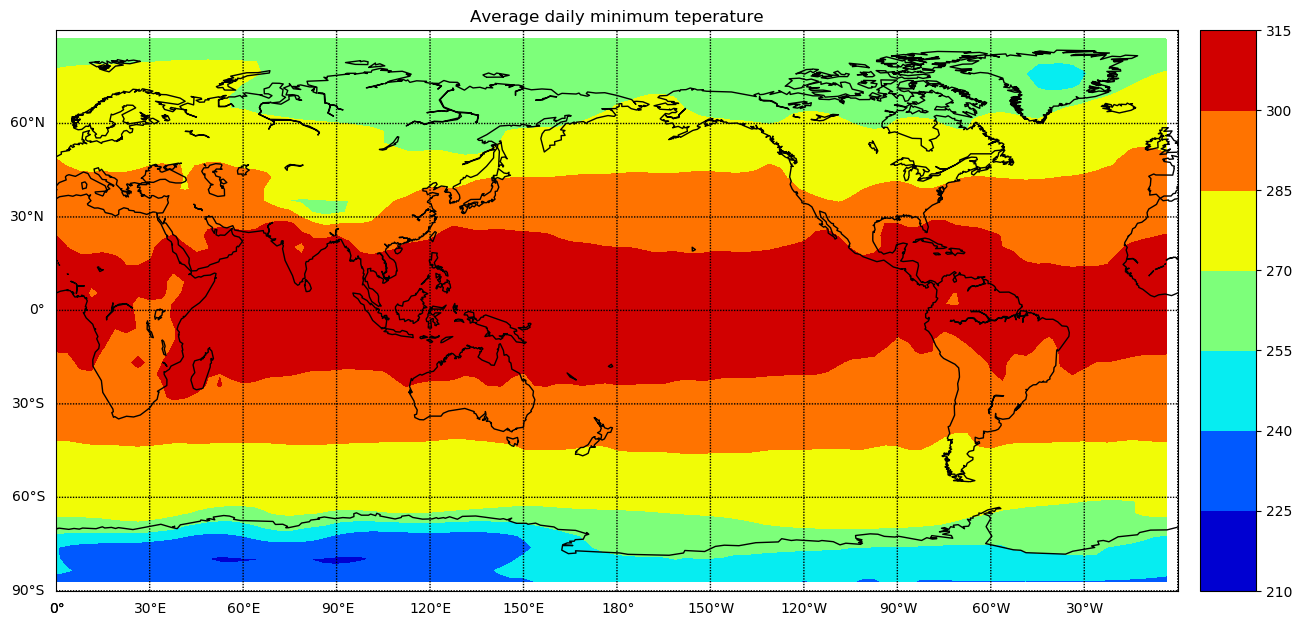

In [31]:
fig = plt.figure(figsize=(15, 15), dpi=100)
ax  = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(projection='cyl',llcrnrlat= -90,urcrnrlat= 90, llcrnrlon=0,urcrnrlon=360, resolution='c')

map.drawcoastlines()
map.drawparallels(np.arange( -90, 90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

x, y = np.meshgrid(lon,lat)

clevs = np.arange(0,20,1)

cnplot = map.contourf(x,y,meanMin,cmap=plt.cm.jet)
cbar = map.colorbar(cnplot,location='right')

plt.title('Average daily minimum teperature')
plt.show()

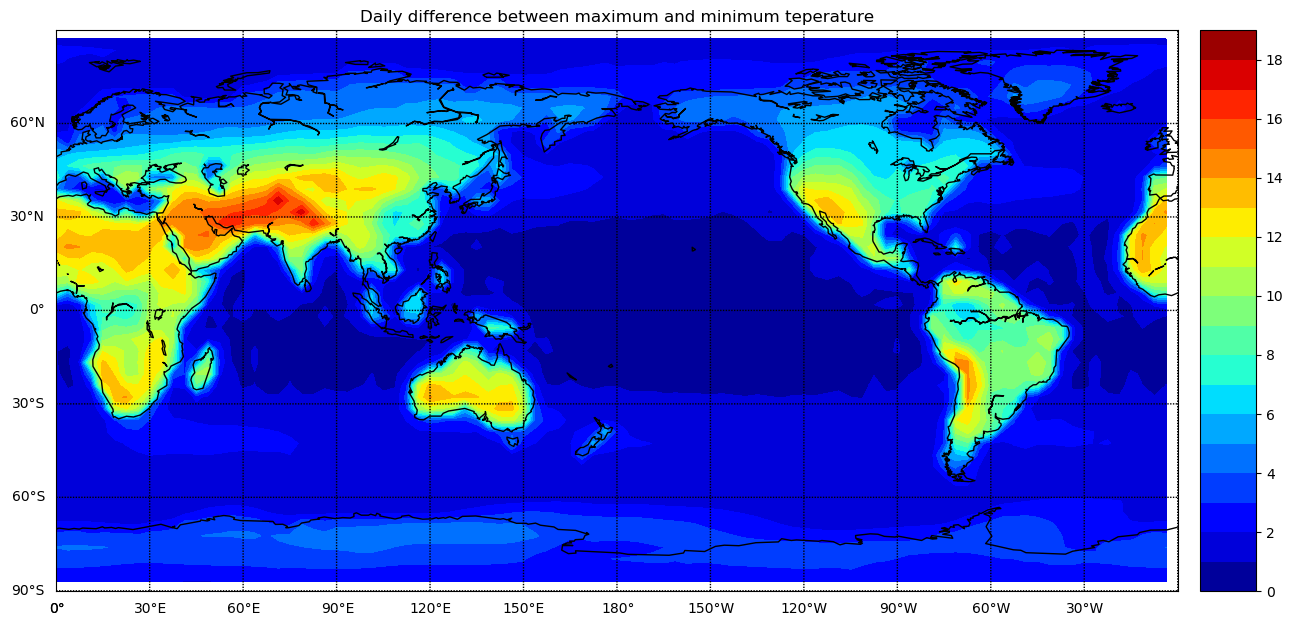

In [32]:
fig = plt.figure(figsize=(15, 15), dpi=100)
ax  = fig.add_axes([0.1,0.1,0.8,0.8])

map = Basemap(projection='cyl',llcrnrlat= -90,urcrnrlat= 90, llcrnrlon=0,urcrnrlon=360, resolution='c')

map.drawcoastlines()
map.drawparallels(np.arange( -90, 90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

x, y = np.meshgrid(lon,lat)

clevs = np.arange(0,20,1)

cnplot = map.contourf(x,y,meanMax - meanMin,clevs, cmap=plt.cm.jet)
cbar = map.colorbar(cnplot,location='right')

plt.title('Daily difference between maximum and minimum teperature')
plt.show()